In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")
import operator

In [180]:
## load dataset
train_features_df = pd.read_csv("../datasets/question3/q3_train_features.csv", header = None)
train_binary_df = pd.read_csv("../datasets/question3/q3_train_binary_labels.csv", header = None)
train_multiclass_df = pd.read_csv("../datasets/question3/q3_train_multiclass_labels.csv", header = None)

test_features_df = pd.read_csv("../datasets/question3/q3_test_features.csv", header = None)
test_binary_df = pd.read_csv("../datasets/question3/q3_test_binary_labels.csv", header = None)
test_multiclass_df = pd.read_csv("../datasets/question3/q3_test_multiclass_labels.csv", header = None)

train_f = train_features_df.values
train_f = train_f[: , 1:]
train_m = train_multiclass_df.values
train_m = np.transpose(train_m)[1]
train_b = train_binary_df.values
train_b = np.transpose(train_b)[1]

test_f = test_features_df.values
test_f = test_f[: , 1:]
test_m = test_multiclass_df.values
test_m = np.transpose(test_m)[1]
test_b = test_binary_df.values
test_b = np.transpose(test_b)[1]

In [181]:
### 5 folds ####
X1 = train_f[0:56,    0:]
X2 = train_f[56:112,  0:]
X3 = train_f[112:168, 0:]
X4 = train_f[168:224, 0:]
X5 = train_f[224:280, 0:]

Y1 = train_b[0:56]
Y2 = train_b[56:112]
Y3 = train_b[112:168]
Y4 = train_b[168:224]
Y5 = train_b[224:280]

train_x_test_folds = [X1, X2, X3, X4, X5]
train_y_test_folds = [Y1, Y2, Y3, Y4, Y5]

train_x_folds = []
train_x_folds.append(np.concatenate((X2, X3, X4, X5)))
train_x_folds.append(np.concatenate((X1, X3, X4, X5)))
train_x_folds.append(np.concatenate((X1, X2, X4, X5)))
train_x_folds.append(np.concatenate((X1, X2, X3, X5)))
train_x_folds.append(np.concatenate((X1, X2, X3, X4)))


train_y_folds = []
train_y_folds.append(np.concatenate((Y2, Y3, Y4, Y5)))
train_y_folds.append(np.concatenate((Y1, Y3, Y4, Y5)))
train_y_folds.append(np.concatenate((Y1, Y2, Y4, Y5)))
train_y_folds.append(np.concatenate((Y1, Y2, Y3, Y5)))
train_y_folds.append(np.concatenate((Y1, Y2, Y3, Y4)))

train_x_folds = np.array(train_x_folds)
train_y_folds = np.array(train_y_folds)


In [182]:
def calc_accuracy(actual_values, predictions):
    correct = 0
    for pred, act in zip(predictions, actual_values):
        #print("pred:" , pred, " act: " , act)
        if pred == act:
            correct += 1
    return (correct/float(len(actual_values))*100)

In [183]:
C = [0.001, 0.01, 0.1, 1, 10, 100]

In [184]:
c_values = []
for c in C:
    classifier = svm.LinearSVC(C = c, random_state = 0)
    accuracies = []
    for i in range(5):
        classifier.fit(train_x_folds[i], train_y_folds[i])
        predictions = classifier.predict(train_x_test_folds[i])
        accuracies.append( calc_accuracy(train_y_test_folds[i], predictions))
    c_values.append((c, (sum(accuracies) / len(accuracies)) ))
c_values

[(0.001, 82.50000000000001),
 (0.01, 82.50000000000001),
 (0.1, 81.07142857142858),
 (1, 79.64285714285715),
 (10, 77.14285714285714),
 (100, 58.92857142857142)]

In [185]:
c_val = []
mean_acc = []
for i in range(len(c_values)):
    c_val.append(str(c_values[i][0]))
    mean_acc.append(c_values[i][1])

<BarContainer object of 6 artists>

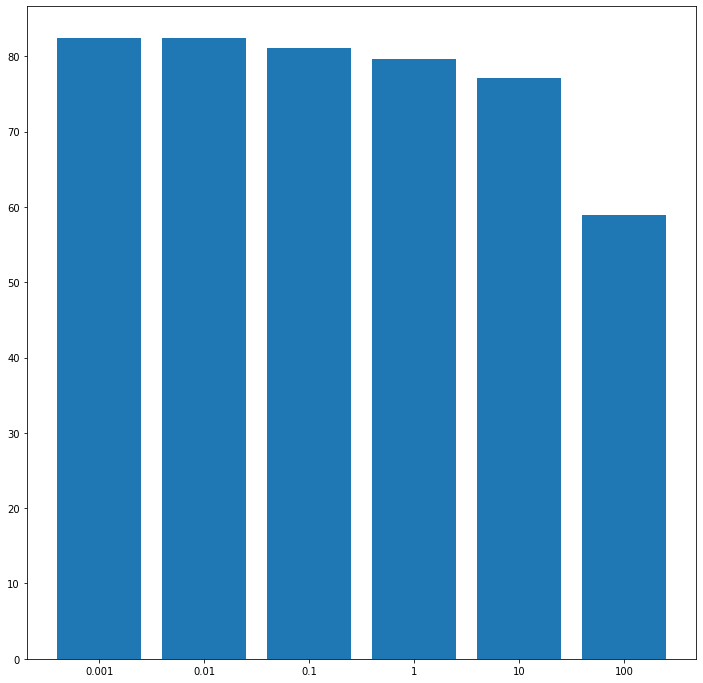

In [186]:
fig = plt.figure(figsize=(12,12))
plt.bar(c_val, mean_acc)

In [187]:
optimal_c_val = max(c_values, key = operator.itemgetter(1))[0]
optimal_c_val

0.001

In [188]:
classifier = svm.LinearSVC(C = optimal_c_val, random_state = 0)
classifier.fit(train_f, train_b)
linear_predictions = classifier.predict(test_f)

In [189]:
acc = calc_accuracy( test_b, np.array(linear_predictions))
acc

82.6086956521739

In [190]:
G = [1/16, 1/8, 1/4, 1/2, 1, 2]

In [191]:
g_values = []
for g in G:
    classifier = svm.SVC( C = optimal_c_val, gamma = g, kernel = 'rbf')
    for i in range(5):
        classifier.fit(train_x_folds[i], train_y_folds[i])
        predictions = classifier.predict(train_x_test_folds[i])
        accuracies.append( calc_accuracy(train_y_test_folds[i], predictions))
    g_values.append((g, (sum(accuracies) / len(accuracies)) ))
g_values

[(0.0625, 70.71428571428571),
 (0.125, 74.64285714285714),
 (0.25, 76.60714285714285),
 (0.5, 77.78571428571426),
 (1, 78.57142857142857),
 (2, 79.1326530612245)]

In [192]:
g_val = []
mean_acc = []
for i in range(len(g_values)):
    g_val.append(str(g_values[i][0]))
    mean_acc.append(g_values[i][1])

<BarContainer object of 6 artists>

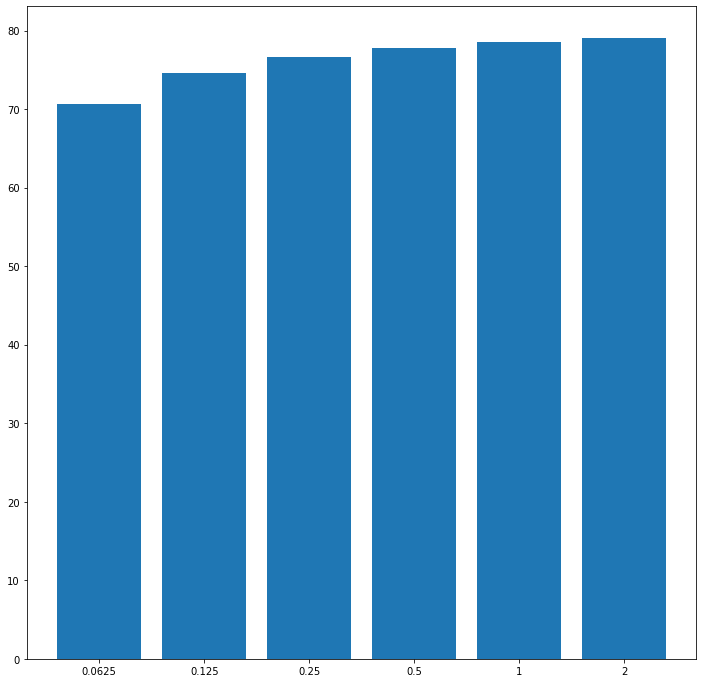

In [193]:
fig = plt.figure(figsize=(12,12))
plt.bar(g_val, mean_acc)

In [194]:
optimal_g_val = max(g_values, key = operator.itemgetter(1))[0]
optimal_g_val

2

In [195]:
classifier = svm.SVC(C = optimal_c_val, gamma = optimal_g_val, kernel = 'rbf')
x = classifier.fit(train_f, train_b)
rbf_predictions = classifier.predict(test_f)

In [196]:
acc = calc_accuracy( test_b, np.array(rbf_predictions))

In [197]:
acc

82.6086956521739

In [198]:
multi_classifier = OneVsRestClassifier(svm.SVC(C = optimal_c_val, gamma = optimal_g_val, kernel = 'rbf')).fit(train_f, train_m)

In [199]:
m_predictions = multi_classifier.predict(test_f)

In [200]:
acc = calc_accuracy(test_m, np.array(m_predictions))

In [201]:
acc

47.82608695652174

In [202]:
### performance metrics
def get_performance_metrics(actual_values, predictions): ## for binary classification
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    precision = 0
    recall = 0
    fdr = 0
    fpr = 0
    npv = 0
    for pred, act in zip(predictions, actual_values):
        if pred == 1:
            if act == 1.0:
                tp += 1
            else:
                fp += 1
        else:
            if act == 1.0:
                fn += 1
            else:
                tn += 1
    if tp == 0 and fp == 0:
        precision =  0
        recall = 0
        fdr = 0
        fpr = 0
    else:
        precision = ( (tp/(tp + fp)) * 100 )
        recall = ( (tp / (tp + fn) ) * 100 )
        fdr = ( (fp / (tp + fp)) * 100 )
        fpr = ( (fp / (fp + tn)) * 100 )
    if tn == 0 and fn == 0:
        npv = 0
    else:
        npv = ( (tn / (tn + fn)) * 100)
    return (fp, tp, fn, tn, precision, recall, fdr, fpr, npv)

def get_f_scores( beta, precision, recall ):
    return ( (1 + np.power(beta, 2)) * precision * recall) / ((np.power(beta,2) * precision) + recall)
         
def get_confusion_matrix_multi(predictions, actual_values):
    cm = np.zeros((3,3))
    for pred, act in zip(predictions, actual_values):
        if act == 0:
            if pred == 0:
                cm[0][0] += 1
            elif pred == 1:
                cm[0][1] += 1
            elif pred == 2:
                cm[0][2] += 1
        elif act == 1:
            if pred == 0:
                cm[1][0] += 1
            elif pred == 1:
                cm[1][1] += 1
            elif pred == 2:
                cm[1][2] += 1
        elif act == 2:
            if pred == 0:
                cm[2][0] += 1
            elif pred == 1:
                cm[2][1] += 1
            elif pred == 2:
                cm[2][2] += 1
    return cm

def get_tp(cm, class_type):
    print("True Positive For Class", str(class_type), " : ", (cm[class_type][class_type]))
    return cm[class_type][class_type]

def get_tn(cm, class_type):
    total = np.sum(cm)
    col_row = 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == class_type or j == class_type:
                col_row += cm[i][j]
    
    print("True Negative For Class", str(class_type), " : ", (total - col_row))
    return total - col_row

def get_fp(cm, class_type):
    fp = 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i != class_type and j == class_type:
                fp += cm[i][j]
    print("False Positive For Class", str(class_type), " : ", fp)
    return fp

def get_fn(cm, class_type):
    fn = 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == class_type and j != class_type:
                fn += cm[i][j]
    print("False Negative For Class", str(class_type), " : ", fn)
    return fn


def get_precision(tp, fp):
    return tp / (tp + fp)

def get_recall(tp, fn):
    return tp / (tp + fn)

def get_npv(tn, fn):
    return tn / (tn + fn)

def get_fpr(fp, tn):
    return fp / (fp + tn)

def get_fdr(tp, fp):
    return fp / ( fp + tp)
    

def micro_performance_metrics(all_tp, all_fp, all_tn, all_fn):
    precision = sum(all_tp)/(sum(all_tp) + sum(all_fp))
    recall = sum(all_tp)/ (sum(all_tp) + sum(all_fn))
    npv = sum(all_tn) / (sum(all_tn) + sum(all_fn))
    fpr = sum(all_fp) / (sum(all_fp) + sum(all_tn))
    fdr = sum(all_fp) / (sum(all_tp) + sum(all_fp))
    return (precision, recall, npv, fpr, fdr)

def macro_performance_metrics(all_precision, all_recall, all_npv, all_fpr, all_fdr):
    k = len(all_precision) # k is common for every value
    precision = sum(all_precision) / k
    recall = sum(all_recall) / k
    npv = sum(all_npv)  / k
    fpr = sum(all_fpr)  / k    
    fdr = sum(all_fdr)  / k    
    return (precision, recall, npv, fpr, fdr)

def print_values(precision, recall, npv, fpr, fdr, macro):
    if macro:
        print("Macro values: ")
    else:
        print("Micro values: ") 
    print("precision: ", precision)
    print("recall: ", recall)    
    print("Negative Predicted Value: ", npv)    
    print("False Positive Rate: ", fpr)    
    print( "False Discovery Rate: ", fdr )

In [203]:
def print_performance_metrics(cm, all_precision, all_recall, all_npv, all_fpr, all_fdr):
    print("Confusion Matrix(Column Predictions, Rows Real Values) ")
    print(cm)
    for i in range(len(all_precision)):
        print("precision for class", str(i),  " : ", all_precision[i])
        print("recall for class", str(i),  " : ", all_recall[i])    
        print("Negative Predicted Value for class", str(i),  " : ", all_npv[i])    
        print("False Positive Rate for class", str(i),  " : ", all_fpr[i])    
        print( "False Discovery Rate for class", str(i),  " : ", all_fdr[i])
        
def print_performance_metrics_binary(fp, tp, fn, tn, precision, recall, fdr, fpr, npv, f1, f2):
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("False Positive Rate: ", fpr)
    print("False Discovery Rate: ", fdr)
    print("Negative Predictive Value: ", npv)
    print( "F1: ", f1 )
    print( "F2: ", f2 )    

In [204]:
cm_multi = get_confusion_matrix_multi(m_predictions, test_m)

In [205]:
tp0 = get_tp(cm_multi, 0)
fp0 = get_fp(cm_multi, 0)
fn0 = get_fn(cm_multi, 0)
tn0 = get_tn(cm_multi, 0)

tp1 = get_tp(cm_multi, 1)
fp1 = get_fp(cm_multi, 1)
fn1 = get_fn(cm_multi, 1)
tn1 = get_tn(cm_multi, 1)

tp2 = get_tp(cm_multi, 2)
fp2 = get_fp(cm_multi, 2)
fn2 = get_fn(cm_multi, 2)
tn2 = get_tn(cm_multi, 2)

True Positive For Class 0  :  52.0
False Positive For Class 0  :  47.0
False Negative For Class 0  :  11.0
True Negative For Class 0  :  5.0
True Positive For Class 1  :  3.0
False Positive For Class 1  :  8.0
False Negative For Class 1  :  29.0
True Negative For Class 1  :  75.0
True Positive For Class 2  :  0.0
False Positive For Class 2  :  5.0
False Negative For Class 2  :  20.0
True Negative For Class 2  :  90.0


In [206]:
precision0 = get_precision(tp0, fp0)
recall0 = get_recall(tp0, fn0)
npv0 = get_npv(tn0, fn0)
fpr0 = get_fpr(fp0, tn0)
fdr0 = get_fdr(tp0, fp0)

precision1 = get_precision(tp1, fp1)
recall1 = get_recall(tp1, fn1)
npv1 = get_npv(tn1, fn1)
fpr1 = get_fpr(fp1, tn1)
fdr1 = get_fdr(tp1, fp1)

precision2 = get_precision(tp2, fp2)
recall2 = get_recall(tp2, fn2)
npv2 = get_npv(tn2, fn2)
fpr2 = get_fpr(fp2, tn2)
fdr2 = get_fdr(tp2, fp2)

In [207]:
all_tp = [tp0, tp1, tp2]
all_fp = [fp0, fp1, fp2]
all_fn = [fn0, fn1, fn2]
all_tn = [tn0, tn1, tn2]

all_precision = [precision0, precision1, precision2]
all_recall = [recall0, recall1, recall2]
all_npv = [npv0, npv1, npv2]
all_fpr = [fpr0, fpr1, fpr2]
all_fdr = [fdr0, fdr1, fdr2]

In [208]:
print_performance_metrics(cm_multi, all_precision, all_recall, all_npv, all_fpr, all_fdr)

Confusion Matrix(Column Predictions, Rows Real Values) 
[[52.  7.  4.]
 [28.  3.  1.]
 [19.  1.  0.]]
precision for class 0  :  0.5252525252525253
recall for class 0  :  0.8253968253968254
Negative Predicted Value for class 0  :  0.3125
False Positive Rate for class 0  :  0.9038461538461539
False Discovery Rate for class 0  :  0.47474747474747475
precision for class 1  :  0.2727272727272727
recall for class 1  :  0.09375
Negative Predicted Value for class 1  :  0.7211538461538461
False Positive Rate for class 1  :  0.0963855421686747
False Discovery Rate for class 1  :  0.7272727272727273
precision for class 2  :  0.0
recall for class 2  :  0.0
Negative Predicted Value for class 2  :  0.8181818181818182
False Positive Rate for class 2  :  0.05263157894736842
False Discovery Rate for class 2  :  1.0


In [209]:
(micro_precision, micro_recall, micro_npv, micro_fpr, micro_fdr) = micro_performance_metrics(all_tp, all_fp, all_tn, all_fn)

In [210]:
print_values(micro_precision, micro_recall, micro_npv, micro_fpr, micro_fdr, False)

Micro values: 
precision:  0.4782608695652174
recall:  0.4782608695652174
Negative Predicted Value:  0.7391304347826086
False Positive Rate:  0.2608695652173913
False Discovery Rate:  0.5217391304347826


In [211]:
(macro_precision, macro_recall, macro_npv, macro_fpr, macro_fdr) = macro_performance_metrics(all_precision, all_recall, all_npv, all_fpr, all_fdr)

In [212]:
print_values(macro_precision, macro_recall, macro_npv, macro_fpr, macro_fdr, True)

Macro values: 
precision:  0.265993265993266
recall:  0.3063822751322751
Negative Predicted Value:  0.6172785547785549
False Positive Rate:  0.350954424987399
False Discovery Rate:  0.734006734006734


In [213]:
################ BINARY LINEAR SVM ###################
(fp, tp, fn, tn, precision, recall, fdr, fpr, npv) = get_performance_metrics(test_b, linear_predictions)

In [214]:
f1 = get_f_scores(1, precision, recall)
f2 = get_f_scores(2, precision, recall)

In [215]:
print("Performance Metrics for Linear SVM Binary Classification: ")
print_performance_metrics_binary(fp, tp, fn, tn, precision, recall, fdr, fpr, npv, f1, f2)

Performance Metrics for Linear SVM Binary Classification: 
Precision:  0
Recall:  0
False Positive Rate:  0
False Discovery Rate:  0
Negative Predictive Value:  82.6086956521739
F1:  nan
F2:  nan


In [216]:
################ BINARY RBF SVM ###################
(fp, tp, fn, tn, precision, recall, fdr, fpr, npv) = get_performance_metrics(test_b, rbf_predictions)

In [217]:
f1 = get_f_scores(1, precision, recall)
f2 = get_f_scores(2, precision, recall)

In [218]:
print("Performance Metrics for RBF SVM Binary Classification: ")
print_performance_metrics_binary(fp, tp, fn, tn, precision, recall, fdr, fpr, npv, f1, f2)

Performance Metrics for RBF SVM Binary Classification: 
Precision:  0
Recall:  0
False Positive Rate:  0
False Discovery Rate:  0
Negative Predictive Value:  82.6086956521739
F1:  nan
F2:  nan


In [219]:
print("# of 0s in binary train dataset:", (train_b == 0).sum())

# of 0s in binary train dataset: 231


In [220]:
print("# of 1s in binary train dataset:",(train_b == 1).sum())

# of 1s in binary train dataset: 49


In [221]:
print("# of 0s in binary multiclass dataset:", (train_m == 0).sum())

# of 0s in binary multiclass dataset: 133


In [222]:
print("# of 1s in binary multiclass dataset:", (train_m == 1).sum())

# of 1s in binary multiclass dataset: 98


In [223]:
print("# of 2s in binary multiclass dataset:", (train_m == 2).sum())

# of 2s in binary multiclass dataset: 49


In [224]:
print( "f scores of multiclass classifications: ")
print( "Class 0, f1: ", get_f_scores( 1, precision0, recall0) )
print( "Class 0, f2: ", get_f_scores( 2, precision0, recall0) )

print( "Class 1, f1: ", get_f_scores( 1, precision1, recall1) )
print( "Class 1, f2: ", get_f_scores( 2, precision1, recall1) )

print( "Class 2, f1: ", get_f_scores( 1, precision2, recall2) )
print( "Class 2, f2: ", get_f_scores( 2, precision2, recall2) )

f scores of multiclass classifications: 
Class 0, f1:  0.6419753086419753
Class 0, f2:  0.7407407407407407
Class 1, f1:  0.13953488372093023
Class 1, f2:  0.10791366906474821
Class 2, f1:  nan
Class 2, f2:  nan
